<a href="https://colab.research.google.com/github/shrad1997/Decision_tree/blob/main/Decision_tree_FraudCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
df=pd.read_csv("/content/Fraud_check (1).csv")

In [3]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df=df.rename(columns={ 'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'})


In [6]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
status=pd.cut(df.Taxable_Income,bins=[0,30000,99619],labels=['Risky','Good'])

In [8]:
df.insert(6,"status",status)

In [9]:
df=df.drop("Taxable_Income",axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital_Status   600 non-null    object  
 2   City_Population  600 non-null    int64   
 3   Work_Experience  600 non-null    int64   
 4   Urban            600 non-null    object  
 5   status           600 non-null    category
dtypes: category(1), int64(2), object(3)
memory usage: 24.2+ KB


In [11]:
df.status.unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['status']= label_encoder.fit_transform(df['status'])

In [13]:
df.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital_Status   600 non-null    int64
 2   City_Population  600 non-null    int64
 3   Work_Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   status           600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [16]:
x=df.iloc[:,0:5]
x

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
y=df.iloc[:,5]

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int64

In [19]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=4)

In [20]:
### Building Decision Tree Classifier using Entropy Criteria

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
model.classes_

array([0, 1])

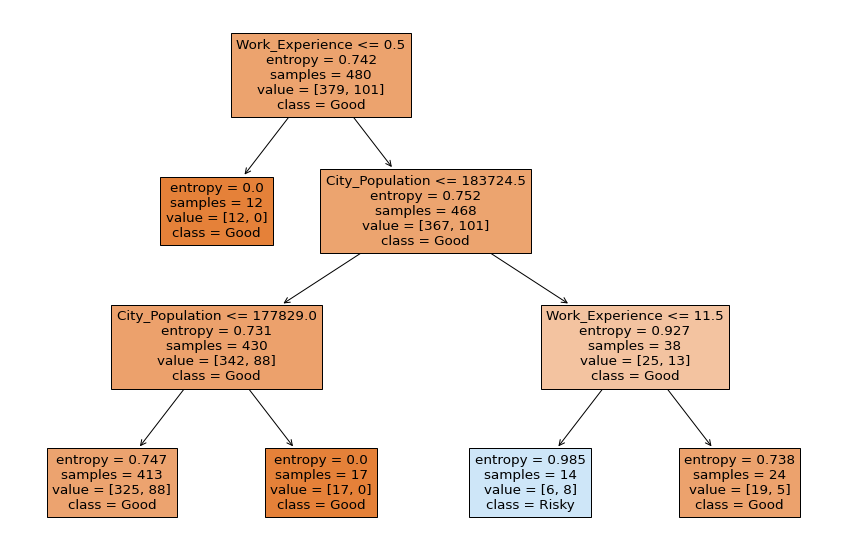

In [24]:
plt.figure(figsize=(15,10))
cn=['Good','Risky']
tree.plot_tree(model,filled=True,feature_names=x.columns,class_names=cn);

In [25]:
preds=model.predict(x_test)

In [26]:
pd.crosstab(y_test,preds)

col_0,0,1
status,,
0,95,2
1,23,0


In [27]:
# Accuracy 
np.mean(preds==y_test)

0.7916666666666666

In [28]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred2=model.predict(x_test)
np.mean(pred2==y_test)

0.7916666666666666